## 1. Import Libraries

In [474]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the Dataset

In [475]:
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [476]:
df.shape


(166800, 17)

In [477]:
df.head(0)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [478]:
df.columns
df = df.drop(["DOL Vehicle ID","County","City", "Legislative District", "Postal Code", "Vehicle Location", "Electric Utility", "State"], axis=1)
df.columns


Index(['VIN (1-10)', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', '2020 Census Tract'],
      dtype='object')

In [479]:
df.duplicated().sum()

18714

In [480]:
df = df.drop_duplicates()

In [481]:
df.duplicated().sum()

0

In [482]:
df.duplicated(["Model"]).sum()


147948

In [483]:
df = df.drop_duplicates(["Model"])

In [484]:
df.duplicated(["Model"]).sum()

0

In [485]:
df.isna().sum()

VIN (1-10)                                           0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
2020 Census Tract                                    0
dtype: int64

In [486]:
num_rows = df.shape[0]
missing_broker_rows = df["2020 Census Tract"].isna().sum()
print((missing_broker_rows/ num_rows) * 100)

0.0


In [487]:
df["2020 Census Tract"].loc[df.isna().any(axis = 1)]
df["2020 Census Tract"].unique()
df["2020 Census Tract"] = df["2020 Census Tract"].map(lambda code:0 if pd.isna(code) else code)


In [488]:
df["2020 Census Tract"].unique()

array([5.30770007e+10, 5.30670123e+10, 5.30330258e+10, 5.30610519e+10,
       5.30330293e+10, 5.30359401e+10, 5.30350929e+10, 5.30350905e+10,
       5.30330324e+10, 5.30670120e+10, 5.30330248e+10, 5.30350803e+10,
       5.30350911e+10, 5.30350912e+10, 5.30670113e+10, 5.30770016e+10,
       5.30770009e+10, 5.30610418e+10, 5.30670119e+10, 5.30770030e+10,
       5.30350907e+10, 5.30770028e+10, 5.30610515e+10, 5.30350914e+10,
       5.30670124e+10, 5.30079605e+10, 5.30610526e+10, 5.30610417e+10,
       5.30610420e+10, 5.30350920e+10, 5.30610528e+10, 5.30110412e+10,
       5.30330267e+10, 5.30330020e+10, 5.30330282e+10, 5.30330249e+10,
       5.30330014e+10, 5.30350807e+10, 5.30350910e+10, 5.30330120e+10,
       5.30330219e+10, 5.30330078e+10, 5.30330220e+10, 5.30330247e+10,
       5.30330322e+10, 5.30110431e+10, 5.30330213e+10, 5.30330296e+10,
       5.30110413e+10, 5.30330010e+10, 5.30330234e+10, 5.30330226e+10,
       5.30110412e+10, 5.30330012e+10, 5.30350909e+10, 5.30330220e+10,
      

In [489]:
df["2020 Census Tract"].isna().sum()

0

In [490]:
num_rows = df.shape[0]
print(num_rows)

138


<Axes: title={'center': 'Model Year vs 2020 Census Tract'}, xlabel='Model Year', ylabel='2020 Census Tract'>

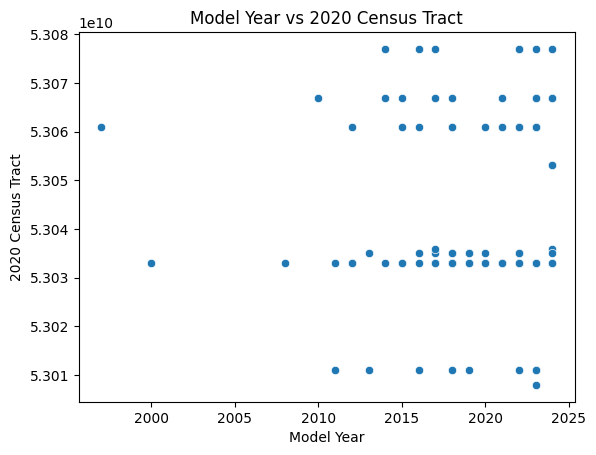

In [491]:
plt.title("Model Year vs 2020 Census Tract")
sns.scatterplot(data=df, x="Model Year", y="2020 Census Tract")

In [492]:
df = df.sort_values(["Electric Range"], ascending=False, ignore_index=False).reset_index(drop=True)
Models = df["Model"].head(5)


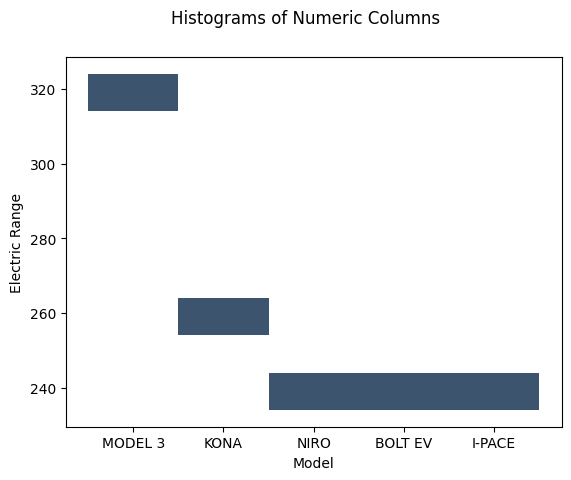

In [494]:


sns.histplot(data=df, x= Models, y= "Electric Range", binwidth =10)

plt.suptitle("Top 5 models by electric range")
plt.show()

<Axes: title={'center': 'Base MSRP vs Model'}, xlabel='Model', ylabel='Base MSRP'>

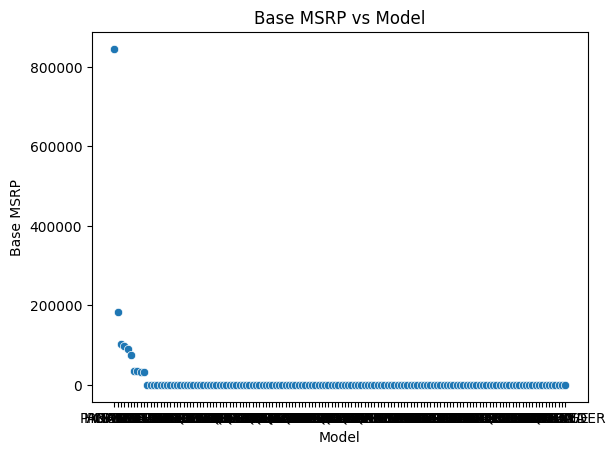

In [501]:
plt.title("Base MSRP vs Model")
sns.scatterplot(data=df, x= "Model", y="Base MSRP")

In [526]:
print(df.loc[df['Base MSRP'] > 0])


   VIN (1-10)  Model Year                  Make      Model  \
0  WP0CA2A13F        2015               PORSCHE        918   
1  WP0AH2A71J        2018               PORSCHE   PANAMERA   
2  YH4K14AA0C        2012                FISKER      KARMA   
3  5YJRE11B88        2008                 TESLA   ROADSTER   
4  WBA7J2C51J        2018                   BMW       740E   
5  LREKK5RX9J        2018              CADILLAC        CT6   
6  JF2GTDNCXK        2019                SUBARU  CROSSTREK   
7  KNDJX3AE0J        2018                   KIA    SOUL EV   
8  1W9WL21B6A        2010  WHEEGO ELECTRIC CARS     WHEEGO   
9  KNDJX3AE6G        2016                   KIA       SOUL   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   
5  Plug-in Hybrid Electric Vehicle (PHEV)   
6 

In [525]:
prices = df.loc[df['Base MSRP'] < 20000]
print(prices["Base MSRP"])

10     0
11     0
12     0
13     0
14     0
      ..
133    0
134    0
135    0
136    0
137    0
Name: Base MSRP, Length: 128, dtype: int64


<Axes: title={'center': 'Base MSRP vs Model 2'}, xlabel='Model', ylabel='Base MSRP'>

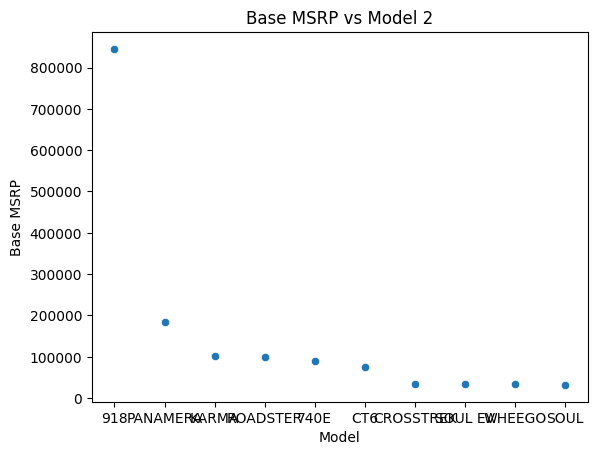

In [530]:

plt.title("Base MSRP vs Model (0>)")
sns.scatterplot(data=df.loc[df['Base MSRP'] > 0], x= "Model", y= "Base MSRP")


In [496]:
df = df.sort_values(["Base MSRP"], ascending=False, ignore_index=False).reset_index(drop=True)

Models2 = df["Model"].head(5)

In [497]:
print(df["Model"].head(100))

0          918
1     PANAMERA
2        KARMA
3     ROADSTER
4         740E
        ...   
95          I3
96      E-GOLF
97     MODEL X
98      E-TRON
99     MODEL S
Name: Model, Length: 100, dtype: object


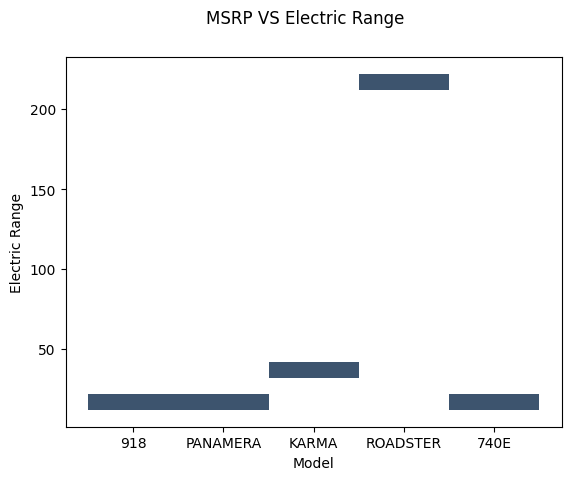

In [498]:

sns.histplot(data=df, x= Models2, y= "Electric Range", binwidth =10)

plt.suptitle("Top 5 most expensive cars electric range")
plt.show()

In [499]:
Avg_price = df['Base MSRP'].mean()
Avg_range  = df["Electric Range"].mean()
price_range = df['Base MSRP'].max() - df['Base MSRP'].min()

questions:
Which car has the oldest / newest model year
what was average electric range by modelcompany and how do that compare to the most expensive cars
most and least expensive cars
